### Inspiration
* How often are exoplanets confirmed in the existing literature disconfirmed by measurements from Kepler? How about the other way round?  
* What general characteristics about exoplanets (that we can find) can you derive from this dataset?  
* What exoplanets get assigned names in the literature? What is the distribution of confidence scores?

### Parameters in the data file:
1. **kepoi_name** -  A KOI is a target identified by the Kepler Project that displays at least one transit-like sequence within Kepler time-series photometry that appears to be of astrophysical origin and initially consistent with a planetary transit hypothesis.  
2. **koi_disposition** - The disposition in the literature towards this exoplanet candidate. One of CANDIDATE, FALSE POSITIVE, NOT DISPOSITIONED or CONFIRMED.  
3. **koi_pdisposition** - The disposition Kepler data analysis has towards this exoplanet candidate. One of FALSE POSITIVE, NOT DISPOSITIONED, and CANDIDATE.  
4. **koi_score** -  A value between 0 and 1 that indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition.  
5. **koi_period** - The interval between consecutive planetary transits (days).  
6. **koi_impact** - The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction, normalized by the stellar radius.  
7. **koi_duration** - The duration of the observed transits (hours).  
8. **koi_prad** - The radius of the planet (Earth radii). Planetary radius is the product of the planet star radius ratio and the stellar radius.  
9. **koi_srad** - The photospheric radius of the star (solar radius).  
10. **koi_teq** - Approximation for the temperature of the planet (Kelvins).  
11. **koi_dor** - The distance between the planet and the star at mid-transit divided by the stellar radius.   
12. **koi_steff** - The photospheric temperature of the star (Kelvin).  

In [1]:
import pandas as pd
import missingno as msng
from sklearn.impute import SimpleImputer

In [2]:
kepler_data = pd.read_csv('cumulative.csv')
kepler_data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


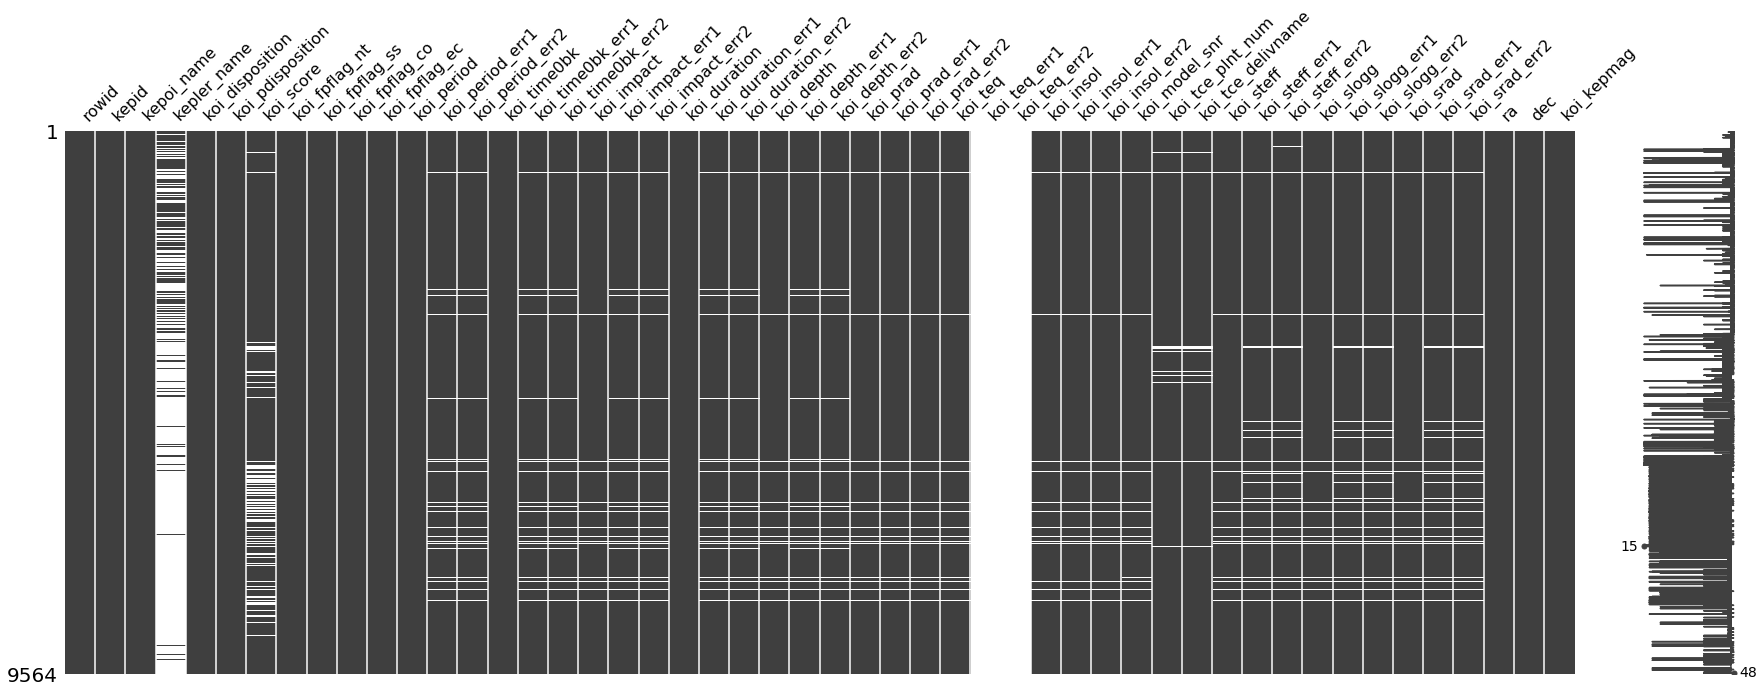

In [3]:
# look for the missing values
msng.matrix(kepler_data, figsize=(30,10))

In [4]:
kepler_data.isnull().sum()

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff   

**kepler_name has more than half of its values missing. Out of 9564, 7270 are missing. All the values from koi_teq_err1 and koi_teq_err2 are missing. It would be more appropriate to drop these columns.**

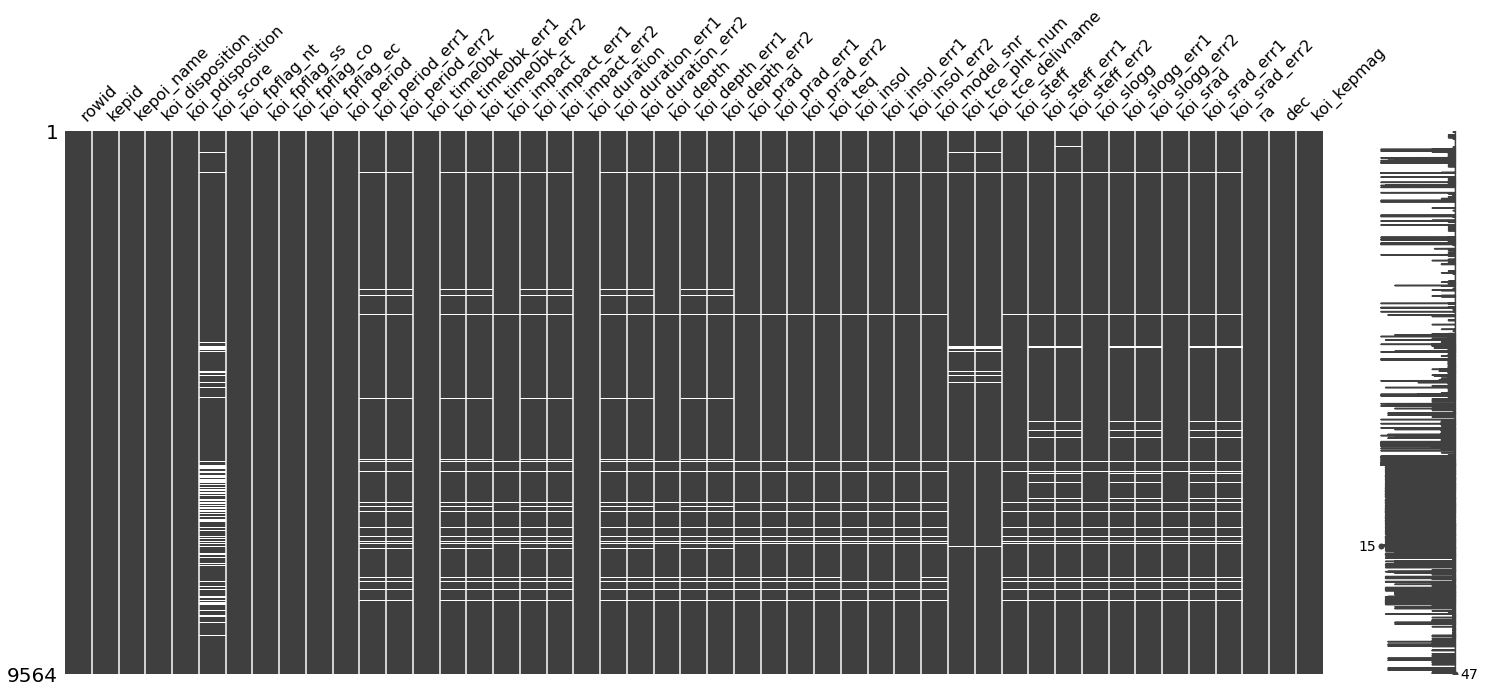

In [5]:
msng.matrix(kepler_data.drop(['koi_teq_err1', 'koi_teq_err2', 'kepler_name'], axis=1))

In [6]:
# Drop the objects in the data frame momentarily to replace the missing values with the average of the columns 
# and then we will put the necessary dropped columns back
df = kepler_data.drop(['koi_teq_err1', 'koi_teq_err2', 'kepler_name', 'kepoi_name', 'koi_disposition', 'koi_pdisposition', 'koi_tce_delivname'], axis=1)

In [7]:
# Replace the blank columns with the average of the whole columns using simple imputer
my_imputer = SimpleImputer()

imputed_df = pd.DataFrame(my_imputer.fit_transform(df), columns = df.columns)

In [8]:
imputed_df['kepoi_name'] = kepler_data['kepoi_name']
imputed_df['koi_disposition'] = kepler_data['koi_disposition']
imputed_df['koi_pdisposition'] = kepler_data['koi_pdisposition']

In [9]:
imputed_df

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,kepoi_name,koi_disposition,koi_pdisposition
0,1.0,10797460.0,1.000,0.0,0.0,0.0,0.0,9.488036,2.775000e-05,-2.775000e-05,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,K00752.01,CONFIRMED,CANDIDATE
1,2.0,10797460.0,0.969,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,K00752.02,CONFIRMED,CANDIDATE
2,3.0,10811496.0,0.000,0.0,1.0,0.0,0.0,19.899140,1.494000e-05,-1.494000e-05,...,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,K00753.01,FALSE POSITIVE,FALSE POSITIVE
3,4.0,10848459.0,0.000,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,...,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,K00754.01,FALSE POSITIVE,FALSE POSITIVE
4,5.0,10854555.0,1.000,0.0,0.0,0.0,0.0,2.525592,3.761000e-06,-3.761000e-06,...,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,K00755.01,CONFIRMED,CANDIDATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560.0,10031643.0,0.000,0.0,0.0,0.0,1.0,8.589871,1.846000e-04,-1.846000e-04,...,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478,K07984.01,FALSE POSITIVE,FALSE POSITIVE
9560,9561.0,10090151.0,0.000,0.0,1.0,1.0,0.0,0.527699,1.160000e-07,-1.160000e-07,...,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,K07985.01,FALSE POSITIVE,FALSE POSITIVE
9561,9562.0,10128825.0,0.497,0.0,0.0,0.0,0.0,1.739849,1.780000e-05,-1.780000e-05,...,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757,K07986.01,CANDIDATE,CANDIDATE
9562,9563.0,10147276.0,0.021,0.0,0.0,1.0,0.0,0.681402,2.434000e-06,-2.434000e-06,...,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,K07987.01,FALSE POSITIVE,FALSE POSITIVE


In [10]:
# bring back the removed columns to their original place in the data frame
pop_ID = imputed_df.pop('kepoi_name')
imputed_df.insert(2, 'kepoi_name', pop_ID)

pop_disp = imputed_df.pop('koi_disposition')
imputed_df.insert(3, 'koi_disposition', pop_disp)

pop_pdisp = imputed_df.pop('koi_pdisposition')
imputed_df.insert(4, 'koi_pdisposition', pop_pdisp)

In [11]:
imputed_df

,rowid,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1.0,10797460.0,K00752.01,CONFIRMED,CANDIDATE,1.000,0.0,0.0,0.0,0.0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2.0,10797460.0,K00752.02,CONFIRMED,CANDIDATE,0.969,0.0,0.0,0.0,0.0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3.0,10811496.0,K00753.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0.0,1.0,0.0,0.0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4.0,10848459.0,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0.0,1.0,0.0,0.0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5.0,10854555.0,K00755.01,CONFIRMED,CANDIDATE,1.000,0.0,0.0,0.0,0.0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560.0,10031643.0,K07984.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0.0,0.0,0.0,1.0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561.0,10090151.0,K07985.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0.0,1.0,1.0,0.0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562.0,10128825.0,K07986.01,CANDIDATE,CANDIDATE,0.497,0.0,0.0,0.0,0.0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563.0,10147276.0,K07987.01,FALSE POSITIVE,FALSE POSITIVE,0.021,0.0,0.0,1.0,0.0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


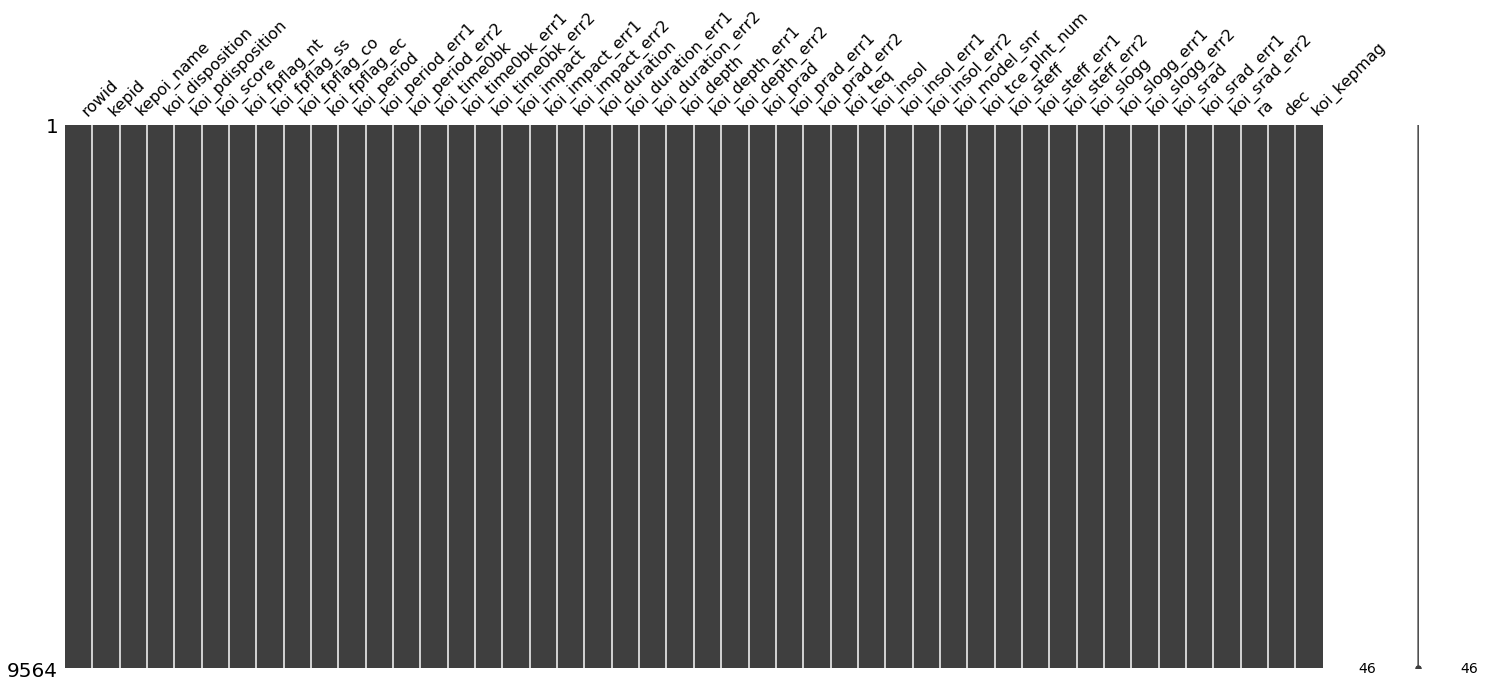

In [12]:
msng.matrix(imputed_df)

In [13]:
imputed_df.isnull().sum()

rowid                0
kepid                0
kepoi_name           0
koi_disposition      0
koi_pdisposition     0
koi_score            0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra         

In [14]:
# Write this new data to a csv file
imputed_df.to_csv('Cleaned_Data.csv')